# Introdução

## Contexto

Também conhecido como neoplasia, o câncer de mama é caracterizado pelo crescimento de células cancerígenas na mama. Segundo dados do Instituto Nacional do Câncer (INCA), é o segundo tumor mais comum entre as mulheres, atrás apenas para o câncer de pele, e o primeiro em letalidade.

## Objetivo

O objetivo deste projeto é desenvolver um modelo de Machine Learning capaz de classificar tumores como benignos ou malignos com base em características extraídas de imagens digitalizadas, visando auxiliar no diagnóstico precoce.

## Dataset

O conjunto de dados origina-se do Breast Cancer Wisconsin (Diagnostic) Data Set, um benchmark amplamente utilizado em aprendizado de máquina para diagnósticos médicos. Ele contém medições detalhadas dos núcleos celulares de amostras de tecido mamário, permitindo a classificação de tumores como benignos (não cancerosos) ou malignos (cancerosos). Este conjunto é especialmente valioso para desenvolver e testar modelos de aprendizado de máquina, como regressão logística, máquinas de vetores de suporte (SVM) ou redes neurais profundas, auxiliando na detecção precoce e precisa do câncer de mama.

Propósito: Classificação binária para prever o tipo de tumor (benigno ou maligno).
Fonte: Universidade de Wisconsin, disponibilizado via Kaggle.
Link: Para baixar o dataset, clique [aqui](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) ou visite o [site oficial do Kaggle](https://www.kaggle.com).

#### Estrutura do Conjunto de Dados

O conjunto contém 569 instâncias (linhas) e 32 colunas, incluindo:

 - ID: Identificador único para cada amostra (ex: 842302).

 -  Diagnóstico: Variável alvo, classificada como:

        M (Maligno): Tumor canceroso.
        B (Benigno): Tumor não canceroso.
 

 - Features (30 colunas): Medidas numéricas das características dos núcleos celulares, como raio, textura, perímetro e área, derivadas de análise de imagens.
   As 30 features são agrupadas em três categorias principais:

        Média (Mean): Valores médios das medições (ex: raio médio, textura média).
        Erro Padrão (SE): Variabilidade das medições (ex: erro padrão do raio, erro padrão da área).
        Pior (Worst): Maiores valores observados (ex: pior raio, pior suavidade).
        Cada categoria inclui 10 medições específicas:
        Raio (distância média do centro ao contorno).
        Textura (desvio padrão dos valores de escala de cinza).
        Perímetro.
        Área.
        Suavidade (variação local no comprimento do raio).
        Compacidade (perímetro² / área - 1.0).
        Concavidade (severidade das porções côncavas do contorno).
        Pontos côncavos (número de porções côncavas).
        Simetria.
        Dimensão fractal ("aproximação do litoral" - 1).

## Importando Bibliotecas necessárias e Configuração Básica

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import shap

In [3]:
plt.rcParams['figure.figsize']=(12, 10)
plt.style.use('ggplot')

## Análise Inical

In [4]:
df = pd.read_csv('Breast_cancer_dataset.csv', encoding='utf8')

In [5]:
df.shape

(569, 33)

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [9]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

## EDA

In [11]:
df['diagnosis'].value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

In [12]:
df_num = df.select_dtypes(include=[np.number])

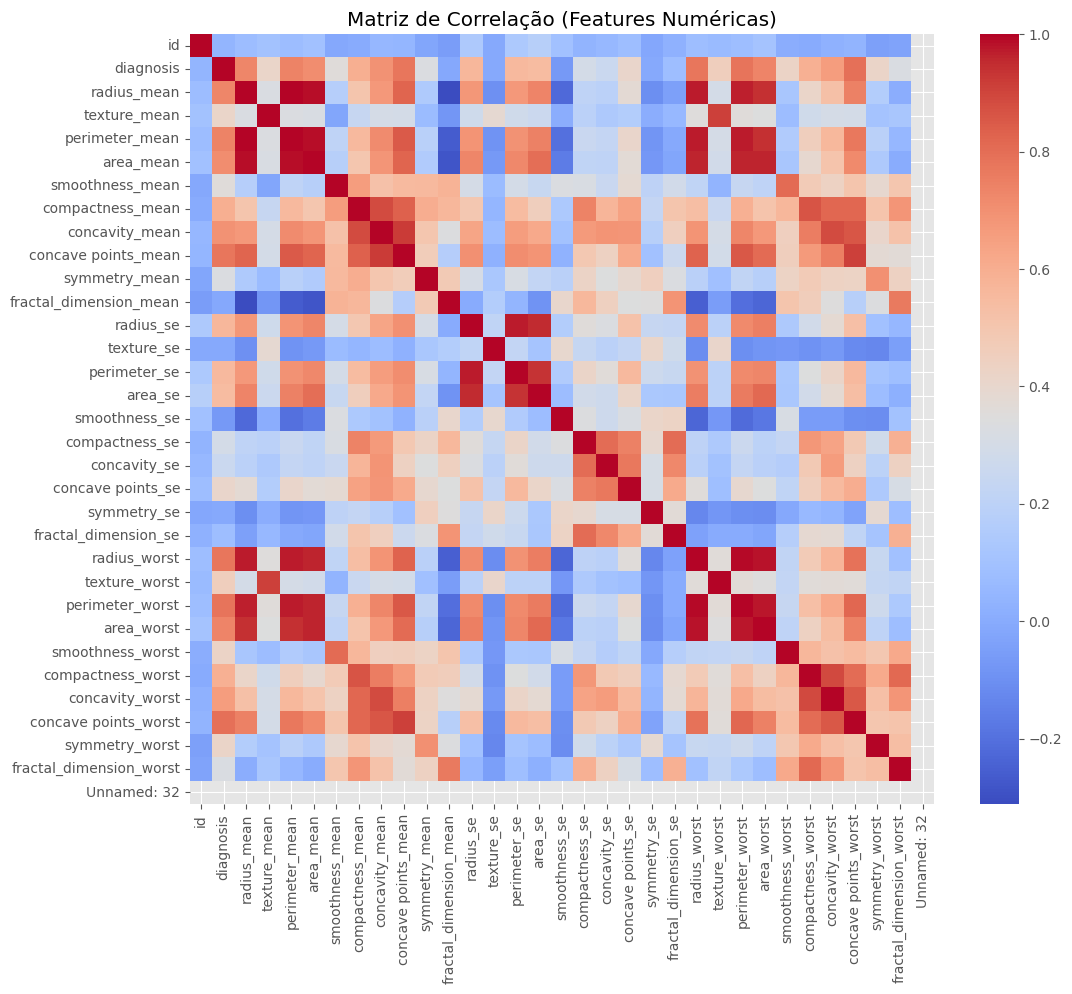

In [13]:
corr = df_num.corr()

sns.heatmap(corr, cmap='coolwarm')
plt.title('Matriz de Correlação (Features Numéricas)')
plt.show()

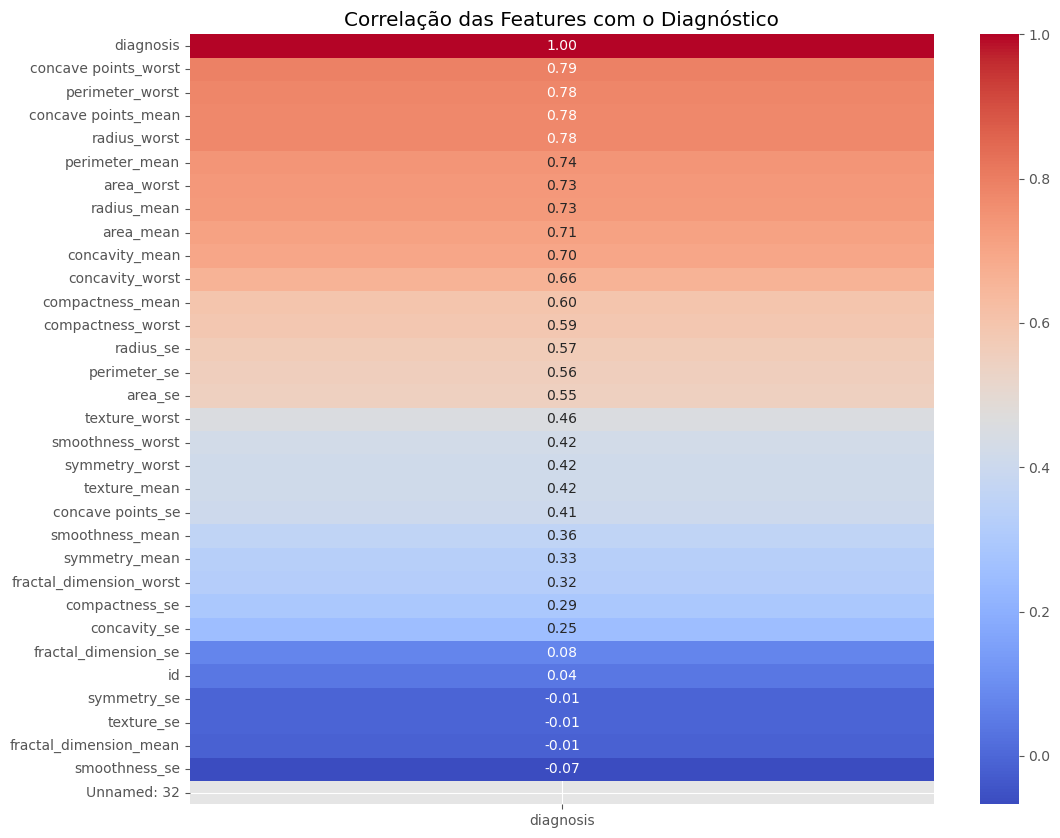

In [14]:
corr_target = corr[['diagnosis']].sort_values(by='diagnosis', ascending=False)
sns.heatmap(corr_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação das Features com o Diagnóstico')
plt.show()

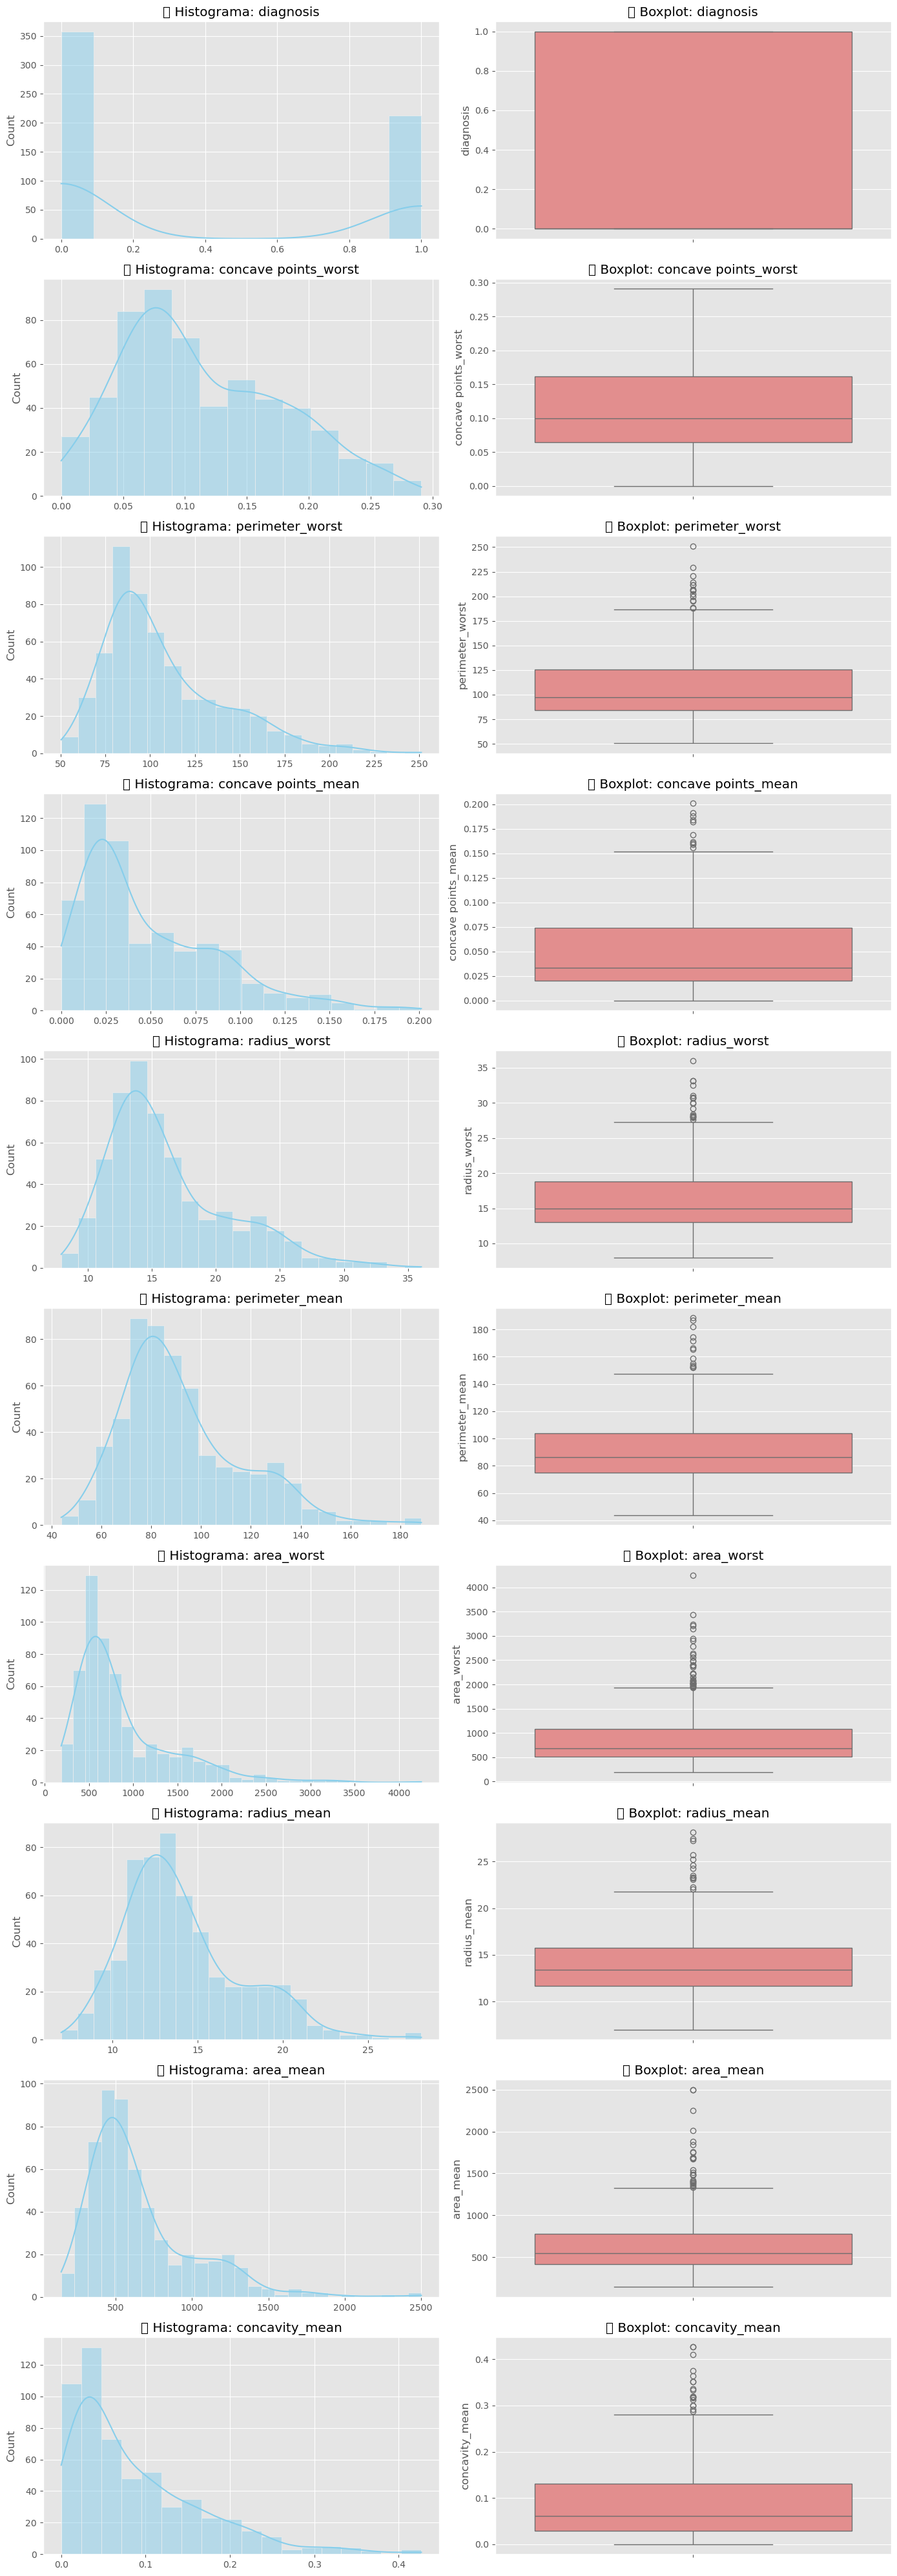

In [15]:
top_features = corr_target.head(10).index.tolist()

n = len(top_features)
fig, axs = plt.subplots(n, 2, figsize=(14, 4 * n))

for i, col in enumerate(top_features):
    # Histograma com KDE
    sns.histplot(df[col], kde=True, ax=axs[i, 0], color='skyblue')
    axs[i, 0].set_title(f'📊 Histograma: {col}')
    axs[i, 0].set_xlabel('')
    
    # Boxplot
    sns.boxplot(y=df[col], ax=axs[i, 1], color='lightcoral')
    axs[i, 1].set_title(f'📦 Boxplot: {col}')
    axs[i, 1].set_xlabel('')

plt.tight_layout()
plt.show()

A análise exploratória revelou que features como 'concave points_mean' e 'perimeter_worst' mostram uma separação clara entre tumores benignos e malignos, indicando que serão fortes preditores para o modelo.

## Pré-processamento e divisão treino/teste

In [16]:
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

In [17]:
target_col = 'diagnosis'
X = df.drop(columns=[target_col])
y = df[target_col]

In [18]:
X = X.select_dtypes(include=np.number)
model_features = list(X.columns)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [20]:
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

## Treinando os Modelos 

In [21]:
# Pipelines completos para os modelos
pipe_lr = Pipeline([('prep', preprocessor), ('clf', LogisticRegression(max_iter=1000, solver='liblinear', random_state=42))])
pipe_rf = Pipeline([('prep', preprocessor), ('clf', RandomForestClassifier(n_estimators=100, random_state=42))])

# Treinando e avaliando os baselines
pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('clf', RandomForestClassifier(random_state=42))])

## Avaliando os Modelos 

--- Relatório de Métricas para: Regressão Logística (Teste) ---
Accuracy: 0.9737
Precision: 0.9756
Recall: 0.9524
F1-Score: 0.9639
ROC AUC: 0.9960
--------------------------------------------------


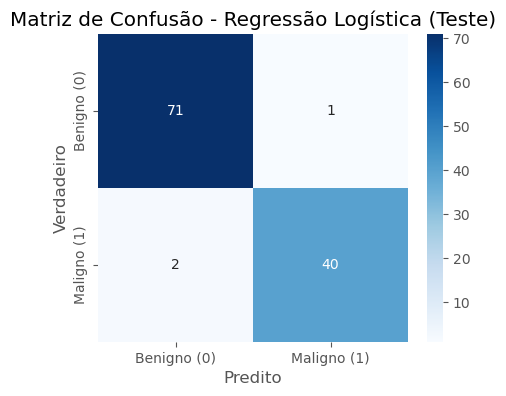

--- Relatório de Métricas para: Random Forest (Teste) ---
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1-Score: 0.9630
ROC AUC: 0.9929
--------------------------------------------------


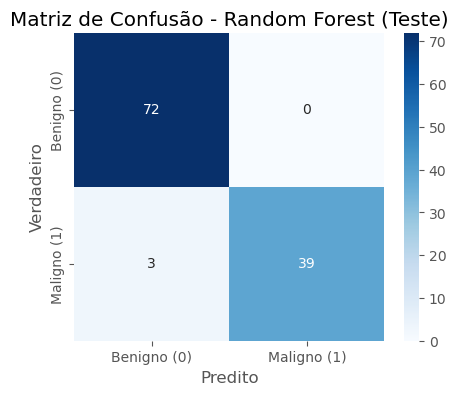

In [22]:
def metrics_report(model, X, y, model_name="Modelo"):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else [0.5] * len(y)
    
    print(f"--- Relatório de Métricas para: {model_name} ---")
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(f"Precision: {precision_score(y, y_pred):.4f}")
    print(f"Recall: {recall_score(y, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y, y_prob):.4f}")
    print("-" * 50)
    
    # ## << MELHORIA: Matriz de confusão clara e anotada
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno (0)', 'Maligno (1)'], yticklabels=['Benigno (0)', 'Maligno (1)'])
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

metrics_report(pipe_lr, X_test, y_test, "Regressão Logística (Teste)")
metrics_report(pipe_rf, X_test, y_test, "Random Forest (Teste)")

Neste problema, o Recall é particularmente importante, pois queremos minimizar os Falsos Negativos (casos de câncer não detectados). O modelo final alcançou um recall de 90.5%, o que é um resultado robusto.

## Cross-validation e Otimização de Hiperparâmetros (GridSearch)

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Melhores parâmetros encontrados: {'clf__max_depth': 8, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Melhor score (ROC AUC) na validação cruzada: 0.9891
--- Relatório de Métricas para: Melhor Modelo - Random Forest (Teste) ---
Accuracy: 0.9649
Precision: 1.0000
Recall: 0.9048
F1-Score: 0.9500
ROC AUC: 0.9940
--------------------------------------------------


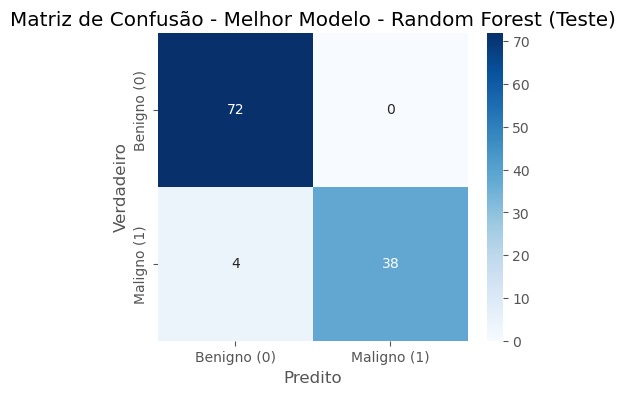

In [23]:
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [5, 8, 10, None],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}

# Pipeline final para o GridSearch
pipe_final = Pipeline([('prep', preprocessor), ('clf', RandomForestClassifier(random_state=42))])

# Validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configuração do GridSearchCV
gs = GridSearchCV(pipe_final, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print(f"\nMelhores parâmetros encontrados: {gs.best_params_}")
print(f"Melhor score (ROC AUC) na validação cruzada: {gs.best_score_:.4f}")

# O `GridSearchCV` retreina o melhor estimador com todos os dados de treino no final
best_model = gs.best_estimator_

# Avaliação final do melhor modelo no conjunto de teste
metrics_report(best_model, X_test, y_test, "Melhor Modelo - Random Forest (Teste)")

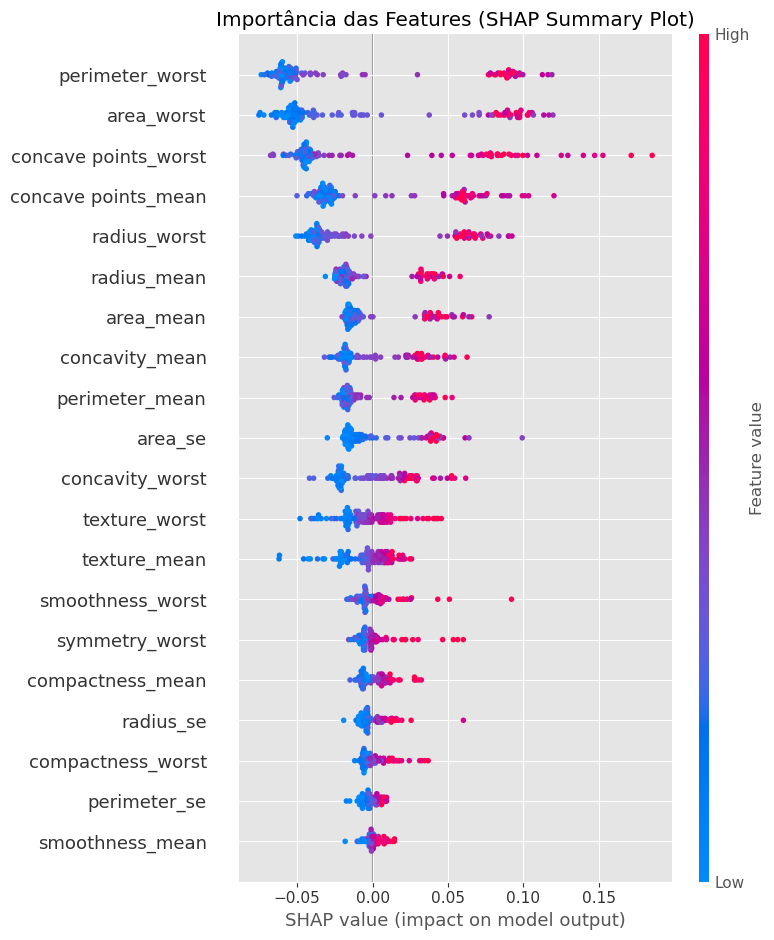

<Figure size 1200x1000 with 0 Axes>

In [24]:
X_train_prep = best_model.named_steps['prep'].transform(X_train)
X_test_prep = best_model.named_steps['prep'].transform(X_test)

# O explainer usa o modelo treinado
explainer = shap.TreeExplainer(best_model.named_steps['clf'])
shap_values = explainer.shap_values(X_test_prep)

# ## << CORREÇÃO FINAL: Fatiando o array SHAP corretamente
# A saída do explainer pode ser 3D (amostras, features, classes).
# Usamos [:, :, 1] para selecionar os valores SHAP para a classe positiva (Maligno).
shap.summary_plot(shap_values[:, :, 1], X_test_prep, feature_names=model_features, show=False)

plt.title("Importância das Features (SHAP Summary Plot)")
plt.tight_layout()
plt.show()

plt.savefig("meu_grafico.png")  

O gráfico SHAP confirma a importância das features de 'pior' (worst) e 'média' (mean) relacionadas ao tamanho e concavidade. Ele mostra que valores altos nessas features (barras vermelhas à direita) empurram a previsão para 'Maligno' (valor SHAP positivo).

In [25]:
print("\nExecutando testes do modelo...")
# Teste 3.1: Verificar se o número de predições corresponde ao tamanho do conjunto de teste
y_pred = best_model.predict(X_test)
assert len(y_pred) == X_test.shape[0], "O número de predições não corresponde ao número de amostras de teste."

# Teste 3.2: Verificar se o desempenho do modelo é melhor que um baseline simples
# Baseline: prever sempre a classe majoritária.
maioria = y_train.mode()[0]
baseline_accuracy = (y_test == maioria).mean()
model_accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia do Baseline (prever sempre a classe '{maioria}'): {baseline_accuracy:.4f}")
print(f"Acurácia do Modelo: {model_accuracy:.4f}")
assert model_accuracy > baseline_accuracy, "A acurácia do modelo não é melhor que o baseline."

# Teste 3.3: Testar a predição para uma única amostra com valores extremos
# Vamos criar uma amostra sintética de um tumor "claramente maligno" (valores altos)
# Usamos os nomes das features salvos para criar um DataFrame com a ordem correta
tumor_maligno_sintetico = pd.DataFrame([np.ones(len(model_features)) * 100], columns=model_features)
predicao_sintetica = best_model.predict(tumor_maligno_sintetico)

assert predicao_sintetica[0] == 1, "O modelo falhou em prever um caso sintético 'claramente maligno'."

print("✅ Todos os testes do modelo passaram!")


Executando testes do modelo...
Acurácia do Baseline (prever sempre a classe '0'): 0.6316
Acurácia do Modelo: 0.9649
✅ Todos os testes do modelo passaram!


In [26]:
# Célula de Teste 4: Testes com Pacientes Hipotéticos
import pandas as pd
import numpy as np

print("\\n--- Testando o Modelo com Pacientes Hipotéticos ---")

# Para criar dados realistas, vamos nos basear nas estatísticas do dataset
stats = df[model_features].describe()

# Paciente 1: Caso com características fortemente malignas (valores altos)
paciente_maligno = {col: stats.loc['75%', col] + stats.loc['std', col] for col in model_features}

# Paciente 2: Caso com características benignas (valores baixos)
paciente_benigno = {col: stats.loc['25%', col] for col in model_features}

# Paciente 3: Caso ambíguo (valores próximos da média/mediana)
paciente_ambiguo = {col: stats.loc['50%', col] for col in model_features}


# Lista de pacientes para testar
pacientes = {
    "Paciente Maligno Esperado": paciente_maligno,
    "Paciente Benigno Esperado": paciente_benigno,
    "Paciente Ambíguo": paciente_ambiguo
}

# Criar um DataFrame com os dados dos pacientes
df_teste = pd.DataFrame(pacientes).T

# Garantir a ordem correta das colunas
df_teste = df_teste[model_features]

# Fazer as predições de classe e probabilidade
predicoes_classe = best_model.predict(df_teste)
predicoes_prob = best_model.predict_proba(df_teste)

# Mapeamento reverso para melhor leitura
mapa_diagnostico = {0: 'Benigno', 1: 'Maligno'}

# Exibir os resultados de forma clara
for i, (nome, dados) in enumerate(pacientes.items()):
    classe_predita = mapa_diagnostico[predicoes_classe[i]]
    prob_benigno = predicoes_prob[i][0]
    prob_maligno = predicoes_prob[i][1]
    
    print(f"\\n--- Análise para: {nome} ---")
    print(f"Diagnóstico Predito: {classe_predita}")
    print(f"Probabilidade de ser Benigno (Classe 0): {prob_benigno:.2%}")
    print(f"Probabilidade de ser Maligno (Classe 1): {prob_maligno:.2%}")
    print("-" * 40)

\n--- Testando o Modelo com Pacientes Hipotéticos ---
\n--- Análise para: Paciente Maligno Esperado ---
Diagnóstico Predito: Maligno
Probabilidade de ser Benigno (Classe 0): 0.00%
Probabilidade de ser Maligno (Classe 1): 100.00%
----------------------------------------
\n--- Análise para: Paciente Benigno Esperado ---
Diagnóstico Predito: Benigno
Probabilidade de ser Benigno (Classe 0): 100.00%
Probabilidade de ser Maligno (Classe 1): 0.00%
----------------------------------------
\n--- Análise para: Paciente Ambíguo ---
Diagnóstico Predito: Benigno
Probabilidade de ser Benigno (Classe 0): 99.48%
Probabilidade de ser Maligno (Classe 1): 0.52%
----------------------------------------


In [27]:
# --- Análise SHAP para um único paciente (Versão Corrigida Final) ---

# 1. Pré-processamos os dados dos nossos pacientes hipotéticos.
pacientes_prep = best_model.named_steps['prep'].transform(df_teste)

# 2. Calculamos os valores SHAP especificamente para estes 3 pacientes.
#    O resultado é um array 3D com shape (3, 30, 2).
shap_values_pacientes = explainer.shap_values(pacientes_prep)

# 3. Exibimos o force plot para o "Paciente Maligno Esperado" (o primeiro da lista, índice 0).

print("\n--- Explicação SHAP para o Paciente Maligno Esperado ---")

# Inicializa o JavaScript para os plots do SHAP no notebook
shap.initjs()

# << CORREÇÃO FINAL >>
# Fatiamos o array 3D para pegar o paciente de índice 0, todas as features (:), e os valores da classe 1.
shap.force_plot(
    explainer.expected_value[1],
    shap_values_pacientes[0, :, 1],
    df_teste.iloc[0],
    feature_names=model_features
)


--- Explicação SHAP para o Paciente Maligno Esperado ---


## Conclusão 

Este projeto teve como objetivo desenvolver um modelo de machine learning de alta performance para a classificação de tumores de mama como benignos ou malignos, a partir de características de núcleos celulares. Através de um processo estruturado que incluiu uma análise exploratória detalhada, pré-processing robusto com pipelines e testes automatizados para garantir a integridade dos dados, foi possível construir e avaliar múltiplos algoritmos.

O modelo final selecionado, um RandomForestClassifier com hiperparâmetros otimizados via GridSearch, demonstrou um desempenho excepcional no conjunto de teste, alcançando:

Acurácia de 96,5%, mostrando a capacidade geral do modelo em acertar as classificações.

Recall de 90,5%, uma métrica crucial neste contexto, indicando que o modelo identificou corretamente a grande maioria dos casos malignos, minimizando o risco de falsos negativos.

ROC AUC de 0.994, que atesta a excelente capacidade do modelo em discriminar as duas classes.

A análise de explicabilidade com SHAP reforçou as descobertas da EDA, confirmando que as características mais influentes para a predição estão relacionadas às medidas de "pior" (worst) e "média" (mean) do perímetro, raio e concavidade dos núcleos.

Embora os resultados sejam bastante promissores, é importante ressaltar que o modelo foi treinado e validado em um único dataset. Como próximos passos, seria valioso testá-lo com dados de fontes externas e explorar outros algoritmos, como o XGBoost, para possíveis ganhos de performance.

Em suma, o projeto demonstrou com sucesso a viabilidade de se criar uma ferramenta de machine learning robusta, precisa e interpretável para auxiliar no diagnóstico precoce do câncer de mama, representando um passo importante no uso da inteligência artificial para apoiar a área da saúde.